In [1]:
import numpy as np
import my
import random

In [2]:
help(np.random.sample)

Help on built-in function sample in module numpy.random.mtrand:

sample(...)
    This is an alias of `random_sample`. See `random_sample`  for the complete
    documentation.



In [3]:
def frontier_mapping(n,k,s):
    W = graphs.CompleteGraph(n-k)
    H = Graph()
    H_vertices = np.arange(n-k,n)
    H.add_vertices(H_vertices)
    G = W.disjoint_union(H)
    G.relabel()
    if s==1:
        return my.L_k_n(k,n)
    elif s==k:
        return my.N_k_n(k,n)
    else:
        # si u dans F alors u adj a tout H
        vertex_colors = {}
        edge_colors = {}
        d_h = k-s
        F_vertices = W.vertices()[:s]
        for v in F_vertices:
            for h in H.vertices():
                G.add_edge(v,h)
        for i in range(k):
            h = H.vertices()[i]
            oth = list(filter(lambda x: x!=h, H.vertices()))
            if d_h == len(oth):
                n_l = oth
            else:
                n_l = random.sample(list(oth), d_h)
            for n_ in n_l:
                H.add_edge(h,n_)
                G.add_edge(h,n_)
                
        for v in G.vertices():
            if (v<n-k):
                if (v<s):
                    vertex_colors[v] = 'red'
                else:
                    vertex_colors[v] = 'gray'
            else:
                vertex_colors[v] = 'green'
        for e in G.edges(labels=False):
            if e in H.edges(labels=False):
                edge_colors[e] = 'green'
            elif e in W.edges(labels=False):
                edge_colors[e] = 'black'
            else:
                edge_colors[e] = 'red'
                
        return G, vertex_colors, edge_colors
                
    

vertices: rouge = F, noir = W, vert = H
arrets: vert = H, noir = W, rouge=F
vertex_colors: {'blue': [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)], 'gray': [(1, (0, 0)), (1, (0, 1)), (1, (0, 2)), (1, (0, 3)), (1, (0, 4))], 'black': [(1, (1, 1)), (1, (1, 2)), (1, (1, 3)), (1, (1, 4)), (1, (1, 5))]} edge_colors: {'green': [((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 3), (0, 4))], 'gray': [((0, 0), (1, (0, 0))), ((0, 0), (1, (0, 1))), ((0, 0), (1, (0, 2))), ((0, 0), (1, (0, 3))), ((0, 0), (1, (0, 4))), ((0, 0), (1, (1, 1))), ((0, 0), (1, (1, 2))), ((0, 0), (1, (1, 3))), ((0, 0), (1, (1, 4))), ((0, 0), (1, (1, 5))), ((0, 1), (1, (0, 0))), ((0, 1), (1, (0, 1))), ((0, 1), (1, (0, 2))), ((0, 1), (1, (0, 3))), ((0, 1), (1, (0, 4))), ((0, 1), (1, (1, 1))), ((0, 1), (1, (1, 2))), ((0, 1), (1, (1, 3))), ((0, 1), (1, (1, 4))), ((0, 1), (1, (1, 5))), ((0, 2), (1, (0, 0))), ((0, 2), (

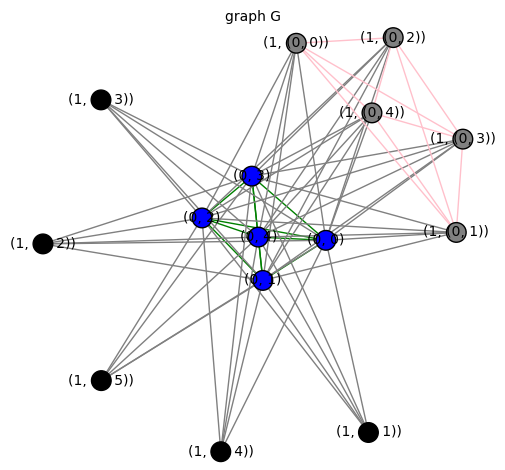

In [4]:
G, vertex_colors, edge_colors = frontier_mapping(15,5,5)
print("vertices: rouge = F, noir = W, vert = H")
print( "arrets: vert = H, noir = W, rouge=F" )
print("vertex_colors:", my.invert_mapping(vertex_colors), "edge_colors:", my.invert_mapping(edge_colors))
test_frontier = G.plot(vertex_size=200, vertex_colors = my.invert_mapping(vertex_colors), edge_colors=my.invert_mapping(edge_colors), title="graph G")

test_frontier.show()